# **Machine Learning Model Comparison: A Comparative Study of Regression Models**

 Create Random Dataset Using Pandas Dataframe

In [6]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate the dataset
area = np.random.uniform(1000, 5000, 1000)
bedrooms = np.random.randint(2, 6, 1000)
bathrooms = np.random.randint(1, 4, 1000)
age = np.random.randint(10, 50, 1000)
price = 200000 + 100 * area + 50000 * bedrooms + 20000 * bathrooms - 5000 * age + np.random.normal(0, 10000, 1000)

# Create a Pandas DataFrame
data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'bathrooms': bathrooms, 'age': age, 'price': price})

# Save the dataset to a CSV file
data.to_csv('house_prices.csv', index=False)

 **Compares multiple machine learning models on a house price dataset, evaluating their performance using Mean Squared Error (MSE). It includes data preprocessing, model training, and results visualization.**

Linear Regression: MSE = 114985760.3602
Decision Tree: MSE = 1068498971.4898
Random Forest: MSE = 464698344.2120
Gradient Boosting: MSE = 251278336.7732


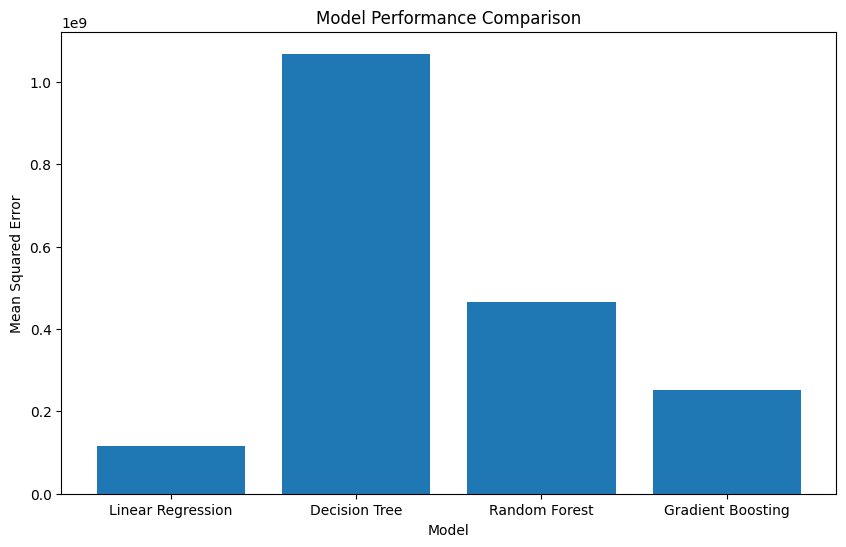

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess dataset
df = pd.read_csv('/content/house_prices.csv')
df.dropna(inplace=True)
X, y = df.drop('price', axis=1), df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate and store model performance
mse_scores = {name: mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)) for name, model in models.items()}
for name, mse in mse_scores.items():
    print(f'{name}: MSE = {mse:.4f}')

# Plot model performance
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()
